In [2]:
%autosave 120
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

Autosaving every 120 seconds


# Bayesian reasoning

Through these exercices, we will see how we can make probabilistic statements using the Bayes' rule. These examples will allow us to work on the concepts of prior, likelihood and posterior probabilities.

## Exercise 1 (Bayesian Data Analysis, Gelman et al, Chapter 1)

Humans male have one X-chromosome and one Y-chromosome, wheras females have two X-chromosomes, each chromosome being inherited from one parent. Hemophilia is a disease that exhibits X-chromosome-linked recessive inheritance, meaning that a male who inherits the gene that causes the disease on the X-chromosome is affected, while a female carrying the gene on only one of her two X-chromosomes is not affected.

Let's consider a woman who has an affected brother and an unaffected father. This implies that her mother carries the hemophilias gene with one "good" and one "bad" gene. Let's consider the random variable $\theta$ describing the state of the woman (carrier or not carrier). 

**1) Give the prior distribution of $\theta$.**


**2)** We are told that the woman has two sons, neither of whom is affected. We consider the random variable $y_i = 1, 0$ which denotes if the son number i is affected or not. The outcomes of the two sons are exchangeable, and conditional on the unknown $\theta$ are indepedent. We'll denote the data $(y_1, y_2)$ as $y$.

**Relying on this information, derive the posterior probability of the woman being affected.**


**3)** Let's suppose that the woman has a third son who is also unaffected. 

**What is the new posterior probability $Pr(\theta=1|y_1, y_2, y_3)$ ?**

## Exercise 2 (Bayesian Data Analysis, Gelman et al, Chapter 1)

Approximately 1/125 of all births are fraternal twins and 1/300 of all births are identical twins. Elvis Presley had a twin brother (who died at birth). 

**What is the probability that Elvis was an identical twin ? We will approximate the probability of a boy or a girl birth as 1/2.**

## Exercise 3 (Bayesian Data Analysis, Gelman et al, Chapter 2)

An early study on *placenta previa*, a condition of pregnancy, found that on a sample of 980 births, 437 were females. We also know that the proportion of female births in the general population is of 0.485. We will denote by $\theta$ the probability of a female birth when the mother is suffering from *placenta previa*. We will assume a prior distribution p($\theta$) = Beta($\alpha$, $\beta$). 

**1) Write the data likelihood.**

**2) Give the posterior probability of the number of births $\theta$ (up to a constant).**

**3) How much evidence this data provide for the claim that the proportion of female births is below 0.485, the proportion of females in the general population ? You'll be summarizinfg information about the posterior distribution using statistics such as the median or posterior intervals.**

# Probability assignment (Bayesian Data Analysis, Gelman et al, Chapter 1)

This exercise aims at showing how probabilities can be assigned starting from a set of subjective assessments.
We will see how this can be done by first relying only on observed data. Then we will see how we can build a simple parametric model based on this empirical evidence.

In [3]:
football_dataset_path = '/user/cabinade/home/Desktop/Bayesian_learning_course/bayesian-learning-git/Exercises/football_dataset.txt'
data = pd.read_csv(football_dataset_path, index_col=False, header=0, sep=",")

Football experts provide a *point spread* for every football game as a measure of the difference in ability between two teams. For instance, team A might be a 4-point favorite to defeat team B. This means that $p(team \ A \ wins \ by \ more \ than \ 4 \ points) = \frac{1}{2}$. The football dataset provides the point spread and actual game outcome for professional football games played between 1981 and 1984.

<IPython.core.display.Javascript object>


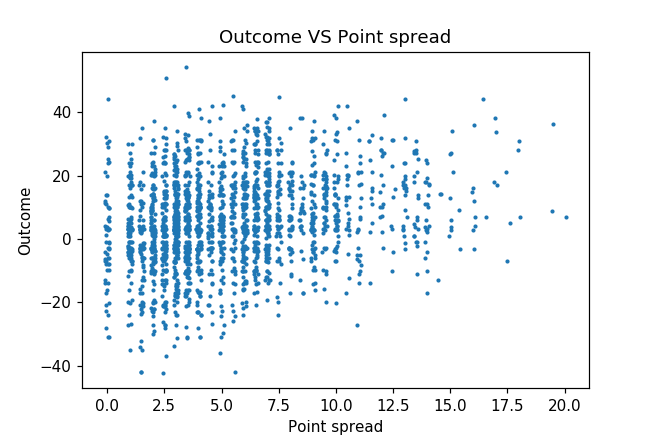

Number of games in dataset = 2240


In [4]:
outcome = np.array(data['favorite'] - data['underdog']) 
point_spread = np.array(data['spread'])

plt.figure(figsize=(6,4))
plt.scatter(point_spread +  0.2*np.random.rand((point_spread.shape[0])) - 0.1,
            outcome + 0.4*np.random.rand((outcome.shape[0])) - 0.2, s=3)
plt.xlabel('Point spread')
plt.ylabel('Outcome')
plt.title('Outcome VS Point spread')
plt.show()
print('Number of games in dataset = ' + str(len(outcome)))

## Assigning probabilities based on observed frequencies

It is of interest to assign probabilities to particular events. A first and natural approach can be to rely on the data that's been gathered to obtain empirical estimates.

**1) Compute:**

- **P1 = Pr(Favorite wins)**
- **P2 = Pr(Favorite wins | point spread = 3.5)**
- **P3 = Pr(Favorite wins by more than the point spread)**
- **P4 = Pr(Favorite wins by more than the point spread | point spread = 3.5)**

We will consider a tied game as one-half win and one-half loss. We will also ignore games without any favorite (point spread = 0)

**2) Compute the following probabilities and comment the results: **

- **P5 = Pr(Favorite wins | point spread = 8.5)**
- **P6 = Pr(Favorite wins | point spread = 9)**

## A parametric model for the difference between outcome and point spread

The graph belows shows the difference between a game outcome and the point spread, plotted against the point spread.
Let's denote by y the outcome of a game and x its point spread.

<IPython.core.display.Javascript object>


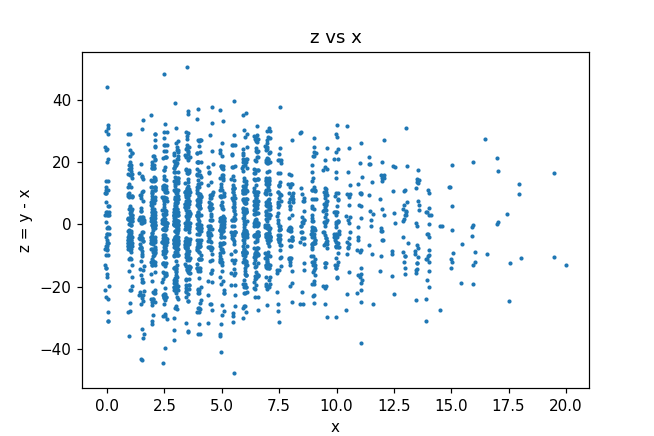

In [5]:
y = np.array(data['favorite'] - data['underdog'])
x = np.array(data['spread'])
z = y - x
plt.figure(figsize=(6,4))
plt.scatter(x +  0.2*np.random.rand((x.shape[0])) - 0.1, 
            z + 0.4*np.random.rand((z.shape[0])) - 0.2, s=3)

plt.xlabel('x')
plt.ylabel('z = y - x')
plt.title('z vs x')
plt.show()

**3) Plot the histogram of z, and the approximated Gaussian distribution of z|x.**

**4) Making use of the approximated distribution of z|x, compute the following probabilities:**

- **P7 = Pr(Favorite wins | point spread = 3.5)**
- **P8 = Pr(Favorite wins | point spread = 8.5)**
- **P9 = Pr(Favorite wins | point spread = 9)**

# Posterior inference (Bayesian Data Analysis, Gelman et al, Chapter 2)

This exercise illustrates how to do posterior inference using standard probability distributions introduced in the class.

Suppose you have a Beta(4,4) prior distribution on the probability $\theta$ that a coin will yield a "head" when spun in a specified manner. The coin is independently spun ten times, and "heads" appear fewer than 3 times. You don't know how many heads were seen, but only that their number is less than 3. We will denote by y the random variable giving the number of heads obtained after the 10 throws.

**1) Write the prior probability distribution of $\theta$ and the conditional y|$\theta$.**

**2) Write the data likelihood.**

**3) Calculate the posterior density of $\theta$ (up to a constant).**

**4) Plot the posterior distribution of $\theta$ (up to a constant).**

# Predictive prior distribution (Bayesian Data Analysis, Gelman et al, Chapter 2)

In this exercise, we show how we can incorporate all the information we have about the parameters of an experiment, in order to derive a predictive prior over the results of this experiement.

Let y be the number of 6's in 1000 independent rolls of a particular real die, which may be unfair. Let $\theta$ be the probability that the die lands on 6. We assume the following prior distribution for $\theta$:

$$
\begin{align}
Pr(\theta = \frac{1}{12}) & = 0.25 \\
Pr(\theta = \frac{1}{6}) & = 0.5 \\
Pr(\theta = \frac{1}{4}) & = 0.25.
\end{align}
$$

**1) Using the normal approximation, give the conditional distribution p(y|$\theta$).**

**2) Give an approximate prior distribution for p(y) and plot it.**

**3) Give approximate 5%, 25%, 50%, 75%, 95% points for the distribution of y.**